# DMR Data Science Intern Takeaway Task

### Introduction

This notebook will walk you through a subset of the tasks required to build and maintain our models and do basic analysis. The final output will be modified version of this notebook which trains a basic model and displays a classification report. This files should be sent back to <a href="mailto:jsands@digital-mr.com?subject=Data%20Science%20Intern%20Task">jsands@digital-mr.com</a> no later than 1 week after receiving this archive.

All code should be implemented in this notebook and feel free to add any additional comments/code blocks/figures as you see fit. You are not expected to have all the knowledge required to do complete the task immediately, but acquire it through a process of research and experimentation.

This particular model will curate publicly available text written in Japanese, do some basic analysis, then train a basic machine learning model that is capable of predicting sentiment (positive, negative or neutral) of an unseen piece of text written in Japanese.

Be sure to include explanations in markup or python comments as you go so that your work can easily be inspected and reviewed by others.

### Import Libraries

Below is a list of modules that are either necessary or that you may find useful. Feel free to expand upon these if required.

In [89]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk import TweetTokenizer
import random
import csv

### Read Data

Inspect the data in the archive and read them into separate pandas dataframes. Do some basic curation then combine them into one. The first one has been done for you.

The wikipedia content is assumed to be neutral sentiment. It also disbalances the data set so only sample 10,000 documents.

The JRTE data was curated by multiple curators per text, each assigning either -1, 0 or 1 to the text which correspond with negative, neutral or positive, respectively. Handle this data as you see fit.

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cp -r /content/drive/MyDrive/assignment/data /content/
# Moving the assignment data folder to content section (I didn't use poetry)

In [91]:
#--- Darkmap Amazon Review Dataset ---#
# Read positive text
df_amazon_jap_neg = pd.read_csv("./data/amazon-jap/10000negative.txt",
                                sep="\\n",
                                header=None,
                                names=["content"],
                                engine='python'
                               )

# Read negative text
df_amazon_jap_pos = pd.read_csv("./data/amazon-jap/10000positive.txt",
                                sep="\\n",
                                header=None,
                                names=["content"],
                                engine='python'
                               )

# Assign sentiment column to the correct text
df_amazon_jap_neg["sentiment"] = "negative"
df_amazon_jap_pos["sentiment"] = "positive"

# Combine the dataframes
df_amazon_jap = pd.concat([df_amazon_jap_neg,df_amazon_jap_pos],
                          sort=False
                         )

# Reset the index
df_amazon_jap.reset_index(drop=True, inplace=True)

# Create a source column to distinguish this data from the other data sources
df_amazon_jap["source"] = "Darkmap Amazon Review Dataset"

# Display option to stop content clipping
pd.set_option('display.max_colwidth', None)

# Display the sentiment distribution and the first 5 entries for manual inspection
print('--------------------- Amazon Japan Sentiment Distribution ---------------------')
print(df_amazon_jap.sentiment.value_counts())
print('-'*79)
df_amazon_jap.head()

#For clarity of training and testing split

df_1 = df_amazon_jap

df_1['sentiment'] = df_1['sentiment'].replace({'positive': 1, 'negative': -1})

df_1.head()

--------------------- Amazon Japan Sentiment Distribution ---------------------
sentiment
negative    10000
positive    10000
Name: count, dtype: int64
-------------------------------------------------------------------------------


,content,sentiment,source
0,機能 制限 で アダルト 制限 して た のに 、 全然 機能 して ませ ん でした 。 我が家 の 中 坊 が 見 まくって いた 履歴 が あって 、 発覚 。 痕跡 を 残す ところ が 、 まだ 子供 です が 。 。 。 Kindle や 、 Android アプリ の 視聴 機能 制限 と は 連動 して ない そうです 。 カスタマー サポート に 確認 済み 。 Amazon が 対応 して くれる まで 、 我が家 で は 、 保護 者 が 家 を 空ける とき は 、 テレビ から スティック を 抜いて いく こと に なり そうです 。 すごく お 気に入り だった のに 、 そこ が かなり マイナスです 。 以下 、 カスタマー センター と の チャット の コピー です 。 お 問い合わせ 内容 ： Fire tv stick の 機能 制限 で 成人 向け コンテンツ の 制限 を オン に して も 、 R15 の ビデオ が 再生 さ れて しまい ます 。 Kindle や スマホ で は コンテンツ に カギ マーク が でて R15 の 制限 が 出来る のです が 、 fire tv で は それ が でき ませ ん 。 どう やって 設定 する のです か 。,-1,Darkmap Amazon Review Dataset
1,本日 この 商品 が 届いて 、 無事に セットアップ が 済み ました 。 家族 で テレビ の 前 に 座って Fire TV Stick を 起動 さ せる と 、 トップ ページ 内 の 「 お すすめ の 日本 映画 」 に 、 声 に する の も はばから れる タイトル 、 下着 姿 の 女性 など 一見 して アダルト 向け ビデオ の それ と わかる 商品 写真 が ずらり と 並び ます 。 電源 を 入れて 現れる トップ ページ です よ ？ もちろん 言う まで も なく 、 「 18 歳 以下 の 視聴 制限 」 は オン で 、 閲覧 でき ない ように なって い ます 。 サポート に 尋ねる と 、 「 18 歳 以下 が 再生 する こと は でき なく なる が 、 お すすめ や 検索 結果 に は 表示 さ れて しまう の が 仕様 である 」 と の こと でした 。 要は 、 この アダルト 向け ビデオ の 表示 を 消す こと は 出来 ない と いう こと です 。 家族 で みんな で 唖然と し ました 。 映画 を 視聴 する たび に 気まずい 空気 に なる なんて 。 ちなみに Apple TV は そんな 画面 は 出て き ませ ん 。 早速 返品 さ せて いただき ました 。 テレビ は タブレット 端末 や スマートフォン と 違い 、 老若 男女 、 みんな で 見る 機会 が 多い もの です 。 Amazon さん と して は 、 こういった こと に 細心の 注意 を 払う こと が 必要で は ない でしょう か 。 配慮 の 足ら な さ を 感じ ます 。,-1,Darkmap Amazon Review Dataset
2,2015/10/29 に 届き ました 。 妻 へ の 誕生日 プレゼント の 一 つ だった ので すぐ 開封 して 動作 確認 し ました 。 Amazon の オープニング 画面 の 後 ブラックアウト 。 何 分 待って も 何 回 試して も ダメだった ので 他の テレビ に 接続 しよう と 思い スティック に 手 を かける と 発熱 して 熱くて 触れ ませ ん でした 。 すぐ に 交換 処理 を しよう と Amazon に 接続 。 交換 の 手続き を しよう と 思い 進んで いく と カスタマー に 連絡 と いう 選択肢 しか 選べ なく なり 仕方なく カスタマー の M さん と チャット 。 何 か の Amazon 側 の トラブル で 交換 処理 が 出来 ない と の こと 。 とても 楽しみに して いた もの な ので きちんと 対応 を して いただける なら 待ち ます と M さん に 伝えた 。 しっかり 対応 する と M さん が 約束 して くれた ので 待つ こと に 。 それ から 丸 ３ 日 待った が 音沙汰 なし 。 Amazon に 不信 感 を 抱き 今度 は メール にて カスタマー に 連絡 。 当然 チャット を した M さん と は 別の 担当 K さん 。 経緯 を 伝えた が 前回 担当 の M さん が 調査 して メール する から 待て と の 旨 の 定型 文 が 返って きた 。 仕方なく もう １ 日 待って みた 。 当然 音沙汰 なし 。 どう なって いる の か ？ と 、 もう 一 度 メール を 送る と 今度 は Ｏ さん が 対応 して 前回 担当 の K さん が 調査 して メール する から 待て と の 旨 の 定型 文 が 送ら れて きた 。 しかし 、 Ｏ さん の 定型 文 に は 『 交換 対応 が 出来 ない かも しれ ない 』 旨 の 文章 が 付け加え られて おり ますます 不安に なった ので 、 交換 出来 ない 可能 が ある の か と 再度 メール にて 質問 する と 、 Ｏ さん から すぐ に 返信 が あり K さん が 調査 して る から 待て と の メール が 返って きた 。 ほんと は ここ に チャット から の やり取り を 全部 貼り付けよう か と 思った けど 、 気持ちよく Amazon を 使って 居ら れる 方 も 大勢 いらっしゃる と 思う ので やめ ました 。 機械 もの な ので 初期 不良 は 仕方 あり ませ ん が 、 Amazon カスタマー の 果たす べき 責任 を うやむやに した たらい回し に この先 も 付き合わ さ れる の か と 思う と 、 正直 嫌に なって き ました 。 私 の 望み は ただ ひと つ 。 良品 と 交換 して ください 。 2015/11/4 最初の 担当 者 の M さん から 交換 の 手続き が でき ました と の 旨 の メール が あり ました 。 最終 的に ちゃんと 対応 して もらえ ました が 、 M さん 以外 の 方 の 対応 に 誠意 が 感じ られ なかった ので 残念でした 。 2015/11/8 交換 商品 の 到着 予定 日 より 少し 早く 代わり の 商品 が 届き ました 。 少し 早く 発送 できる 旨 を カスタマー の U さん が わざわざ 電話 して くれ ました 。 更に 一連の 流れ に つき 丁寧に 謝罪 して くれ ました 。 はじめ から この 対応 だったら … と 、 ますます 残念に … やっと ここ で 商品 の レビュー な のです が 、 設定 は とにかく 簡単です 。 機械 の こと と か 全く 解ら なくて も 誰 に でも できる と 思い ます 。 ホーム 画面 も 思って いた より も 使い やすい のです が 、 音声 認識 機能 付 の リモコン もしくは スマホ アプリ を 使わ ない と 検索 機能 が 少し 使い にくい です 。 私 の 家 の 環境 で は Wi-Fi が 途切れる こと も なく 、 再生 も スムーズに 行わ れ ます 。 使い やす さ と コスト パフォーマンス を 考えたら 商品 自体 は 星 ５ つ です 。,-1,Darkmap Amazon Review Dataset
3,レビュー に つら れて 購入 。 早速 、 解説 どおり に TV に 接続 開始 、 ところが 全然 反応 なし ！ いろいろ 試して も だめだった ので 知恵 袋 を 参照 したら 、 我が家 の TV は 亀山 モデル の AQUOS ！ この 型 に は 反応 し ない と の 回答 を みつけた 次第 で 、 なに これ ～！ それ ぐらい の 注意書き ぐらい あって 然る べき か と ！,-1,Darkmap Amazon Review Dataset
4,設定 は デフォルト の まま です が 、 視聴 出来る 動画 の 数 が 、 PC 版 と 全く 違って 少ない です 。 ちょっと 話 に なら ない くらい 少ない です 。 残念 。,-1,Darkmap Amazon Review Dataset


In [92]:
# Your code and/or markup here.

#--- Wikipedia JL file dataset ---#
df_wiki_jap_neutral = pd.read_json("/content/data/jpneutral/jpwiki.jl",
                                lines=True
                               )
df_wiki_jap_neutral.head()

df = df_wiki_jap_neutral

print(df.shape[0])  # Gives number of rows
print(df.shape[1])  # Gives number of columns

df["sentiment"] = "neutral"

#43,114 documents, needed 10,000 random (but unique) for sample

unique_integers = random.sample(range(1, 43114), 10000)

selected_rows = df.loc[unique_integers]
new_df = pd.DataFrame(selected_rows)

new_df["source"] = "Wikipedia JL"

df_2 = new_df

# Converting neutral to 0

df_2['sentiment'] = df_2['sentiment'].replace('neutral', 0)

# Display the sentiment distribution and the first 5 entries for manual inspection
print('--------------------- Wikpipedia JL dataset ---------------------')
print(new_df.sentiment.value_counts())
print('-'*79)
new_df.head()

df_2.head()

43114
1
--------------------- Wikpipedia JL dataset ---------------------
sentiment
0    10000
Name: count, dtype: int64
-------------------------------------------------------------------------------


,content,sentiment,source
31312,ロサンゼルス・メモリアル・スポーツ・アリーナは、カリフォルニア州ロサンゼルスのロサンゼルス・メモリアル・コロシアム近くにあった屋内競技場。\n1959年7月4日に完成。1984年のオリンピック（ボクシング会場[4]）や、NBAのロサンゼルス・レイカーズ、クリッパーズ、NHLのロサンゼルス・キングスの本拠地として使用されたほか、NCAAバスケットファイナルフォーでは1968年と1972年に開催。また、大相撲公演が1964年、1976年、1981年と2008年に同所で開催された。1986年と1991年には、WWE最大の祭典レッスルマニアが開催された。しかしロサンゼルスFC,0,Wikipedia JL
14600,お六櫛（おろくぐし）とは、長野県木曽郡木祖村薮原で生産される長野県知事指定の伝統工芸品。梳き櫛・解かし櫛・挿し櫛・鬢掻き櫛などがある。\n\nお六櫛の始まりについては、次のような伝説がある[1]。持病の頭痛に悩んでいた村娘お六が、治癒を祈って御嶽山に願いをかけたところ、ミネバリで櫛を作り、髪をとかしなさいというお告げを受けた。お告げのとおりに櫛を作り髪を梳いたところ、これが治った。ミネバリの櫛の名は広まり、享保の頃になると、中山道藪原宿の名物として作られるようになった。太田蜀山人『壬戌紀行』（1802年（享和2年））や山東京伝『於六櫛木曽仇討』（1807年（文化,0,Wikipedia JL
35420,ニルソン図（ニルソンず、英: nilsson diagram）とは、原子核における一粒子エネルギーが変形度ととも変化する様子を表した図である。この図には、球形の原子核において見出された魔法数が変形した状態にも出現する様子が示されており、この変形した状態における魔法数のことを変形魔法数,0,Wikipedia JL
13980,プリム法とは、グラフ理論で重み付き連結グラフの最小全域木を求める最適化問題のアルゴリズムである。全域木（対象となるグラフの全頂点を含む辺の部分集合で構成される木）のうち、その辺群の重みの総和が最小となる木を求めるものである。このアルゴリズムは1930年に数学者 Vojtěch Jarník が発見し、1957年に計算機科学者ロバート・C・プリムが独自に発見、さらに1959年にはエドガー・ダイクストラが再発見しダイクストラ法の論文に記載している。そのため、DJP法、Jarník法、Prim-Jarník法などとも呼ばれることがある。アルゴリズムの発想や計算量は同時期に発表された,0,Wikipedia JL
40707,■プロジェクト:野球選手 ■テンプレート\n越川 昌和（こしかわ まさかず、1984年11月29日 - ）は、千葉県出身の元プロ野球選手（投手）。\n多古高から上武大学を経て、サウザンリーフ市原に入団。\n2008年にベースボール・チャレンジ・リーグの群馬ダイヤモンドペガサスに入団。同年は、主にリリーフや抑えとして活躍し、10セーブを挙げ最多セーブのタイトルを獲得した。\n2009年、先発もこなすようになり6勝（リーグ10位）を挙げ、防御率は1.94（リーグ5位）と活躍。\n2010年、再びリリーフとして活躍し、2008年以来の最多セーブのタイトルを獲得した。\n2011年,0,Wikipedia JL


In [98]:
file_path = '/content/data/jrte-corpus/pn.tsv'

# Function to parse the TSV file
# Okay this part is not useful SINCE at first I thought of using three datasets for
# the model, but in fact, only 1 was needed. So, I thought to remove the voting part of it.
def parse_tsv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter='\t')
        parsed_data = []
        for row in reader:
            curator_id = row[0]
            sentiment = row[1]
            text_parts = []
            json_parts = []
            dataset = row[-1]
            json_started = False

            # Iterate over each part in the row after the sentiment
            for part in row[2:-1]:
                if part.startswith('{'):
                    json_started = True
                if json_started:
                    json_parts.append(part)
                else:
                    text_parts.append(part)

            # Join text parts and json parts
            text = ' '.join(text_parts)
            json_object = ' '.join(json_parts)

            # Append parsed data
            parsed_data.append([curator_id, sentiment, text, json_object, dataset])

        return parsed_data

# Read and parse the data
parsed_data = parse_tsv(file_path)

# Convert to DataFrame
data_df = pd.DataFrame(parsed_data, columns=['curatorid', 'sentiment', 'content', 'vote', 'dataset'])

df_3 = data_df

# Dropping the columns correctly
df_3 = df_3.drop('curatorid', axis=1)
df_3 = df_3.drop('vote', axis=1)
df_3 = df_3.drop('dataset', axis=1)

df_3 = df_3[['content', 'sentiment']]

df_3['source'] = 'JRTE File'
# Print the first few rows to verify the data is loaded correctly
print(df_3.head())
sentiment_counts = df_3['sentiment'].value_counts()
print(sentiment_counts)


              content sentiment     source
0       出張でお世話になりました。         0  JRTE File
1           朝食は普通でした。         0  JRTE File
2         また是非行きたいです。         1  JRTE File
3  また利用したいと思えるホテルでした。         1  JRTE File
4        駅から近くて便利でした。         1  JRTE File
sentiment
1     3406
0     1329
-1     818
Name: count, dtype: int64


In [96]:
# Concatenating three DataFrames: df_1, df_2, df_3
ult_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Convert 'sentiment' column to integer
ult_df['sentiment'] = pd.to_numeric(ult_df['sentiment'], errors='coerce')

# Ensure the sentiment only contains -1, 0, or 1
ult_df['sentiment'] = ult_df['sentiment'].clip(lower=-1, upper=1)

# Check data types of all columns
data_types_updated = ult_df.dtypes

print(data_types_updated)
total_rows = len(ult_df)

# Count of each sentiment category
sentiment_counts = ult_df['sentiment'].value_counts()

# Display the results
print("Total rows:", total_rows)
print("Sentiment counts:\n", sentiment_counts)


# To check ult_df
# Save the DataFrame to a CSV file
#file_path = '/content/ultimate_dataframe.csv'
#ult_df.to_csv(file_path, index=False)

content      object
sentiment     int64
source       object
dtype: object
Total rows: 35553
Sentiment counts:
 sentiment
 1    13406
 0    11329
-1    10818
Name: count, dtype: int64


### Complete Preprocessor Class

Below is a python class which can be used to clean the data. Please study it and add a method to strip all text of the symbols contained within the list `SPEC_CHARS`.

In [122]:
# Your code and/or markup here wherever you see fit.
class TextPreProcessor():
    """
    Rudimentary version for intern task.

        Attributes:
        ----------
            STOPWORDS (lst) : List of Japanese stopwords
            NUMBERS (lst)   : List of digits as string type
            SPEC_CHARS (lst): List of special characters to remove

        Methods:
        --------
        __lowercase
        __exclude_stopwords
        __clean_numbers
        __reduce_whitespaces
        __strip_whitespaces
        __processing_function
        fit
        fit_transform
        transform
    """
    # Initialise list of preprocessing methods to activate
    __preprocessing_stages = []

    # Attributes
    STOPWORDS = ['あそこ', 'あっ', 'あの', 'あのかた', 'あの人', 'あり', 'あります', 'ある', 'あれ', 'い', 'いう', 'います', 'いる', 'う', 'うち', 'え', 'お', 'および', 'おり', 'おります', 'か', 'かつて', 'から', 'が', 'き', 'ここ', 'こちら', 'こと', 'この', 'これ', 'これら', 'さ', 'さらに', 'し', 'しかし', 'する', 'ず', 'せ', 'せる', 'そこ', 'そして', 'その', 'その他', 'その後', 'それ', 'それぞれ', 'それで', 'た', 'ただし', 'たち', 'ため', 'たり', 'だ', 'だっ', 'だれ', 'つ', 'て', 'で', 'でき', 'できる', 'です', 'では', 'でも', 'と', 'という', 'といった', 'とき', 'ところ', 'として', 'とともに', 'とも', 'と共に', 'どこ', 'どの', 'な', 'ない', 'なお', 'なかっ', 'ながら', 'なく', 'なっ', 'など', 'なに', 'なら', 'なり', 'なる', 'なん', 'に', 'において', 'における', 'について', 'にて', 'によって', 'により', 'による', 'に対して', 'に対する', 'に関する', 'の', 'ので', 'のみ', 'は', 'ば', 'へ', 'ほか', 'ほとんど', 'ほど', 'ます', 'また', 'または', 'まで', 'も', 'もの', 'ものの', 'や', 'よう', 'より', 'ら', 'られ', 'られる', 'れ', 'れる', 'を', 'ん', '何', '及び', '彼', '彼女', '我々', '特に', '私', '私達', '貴方', '貴方方']

    NUMBERS = [str(x) for x in range(0,10)]

    SPEC_CHARS = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

    # Initialisation - set preprocessing methods on or off
    def __init__(self, p_lowercase=True, p_exclude_stopwords=True,
                 p_clean_numbers=True, p_strip_whitespaces=True,
                 p_reduce_whitespaces=True, p_strip_special_chars = True):

        if p_lowercase == True:
             self.__preprocessing_stages.append(self.__lowercase)
        if p_exclude_stopwords == True:
            self.__preprocessing_stages.append(self.__exclude_stopwords)
        if p_clean_numbers == True:
             self.__preprocessing_stages.append(self.__clean_numbers)
        if p_strip_whitespaces == True:
             self.__preprocessing_stages.append(self.__strip_whitespaces)
        if p_reduce_whitespaces == True:
             self.__preprocessing_stages.append(self.__reduce_whitespaces)
        if p_strip_special_chars:
             self.__preprocessing_stages.append(self.__strip_special_chars)

    # Text processing methods
    def __lowercase(self, p_str_input):
        p_str_input = str(p_str_input)
        return str.lower(p_str_input)

    def __exclude_stopwords(self, p_str_input):
        p_str_input = str(p_str_input)
        return " ".join([word for word in p_str_input.split() if word not in self.STOPWORDS])

    def __clean_numbers(self, p_str_input):
        p_str_input = str(p_str_input)
        for char in self.NUMBERS:
            p_str_input = p_str_input.replace(char, ' ')
        return p_str_input

    def __reduce_whitespaces(self, p_str_input):
        p_str_input = str(p_str_input)
        return ' '.join(p_str_input.split())

    def __strip_whitespaces(self, p_str_input):
        p_str_input = str(p_str_input)
        return p_str_input.rstrip()

    # Method for processing the other methods
    def __processing_function(self, raw_documents, y=None):

        processed_documents = []

        for document in raw_documents:
            for preprocessing_stage in self.__preprocessing_stages:
                document = preprocessing_stage(p_str_input=document)

            processed_documents.append(document)

        return processed_documents

    # Methods required for sklearn compatibility
    def fit(self, raw_documents, y=None):
        return self.__processing_function(raw_documents=raw_documents)

    def fit_transform(self, raw_documents, y=None):
        return self.__processing_function(raw_documents=raw_documents)

    def transform(self, raw_documents, copy=True):
        return self.__processing_function(raw_documents=raw_documents)

  # My method -->
    def __strip_special_chars(self, p_str_input):
      p_str_input = str(p_str_input)
      for char in self.SPEC_CHARS:
          p_str_input = p_str_input.replace(char, '')
      return p_str_input

In [124]:
from typing import Union, Callable
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    # Define numbers and stopwords as class attributes
    numbers = [str(x) for x in range(0, 10)]
    stopwords = [
        'あそこ', 'あっ', 'あの', 'あのかた', 'あの人', 'あり', 'あります', 'ある', 'あれ', 'い',
        'いう', 'います', 'いる', 'う', 'うち', 'え', 'お', 'および', 'おり', 'おります',
        # Add more stopwords as necessary...
    ]

    def __init__(self, lowercase: bool = True, exclude_stopwords: bool = True,
                 clean_numbers: bool = True, strip_whitespaces: bool = True,
                 reduce_whitespaces: bool = True):
        self.preprocessing_stages = []
        if lowercase:
            self.preprocessing_stages.append(self.lowercase)
        if exclude_stopwords:
            self.preprocessing_stages.append(self.exclude_stopwords)
        if clean_numbers:
            self.preprocessing_stages.append(self.clean_numbers)
        if strip_whitespaces:
            self.preprocessing_stages.append(self.strip_whitespaces)
        if reduce_whitespaces:
            self.preprocessing_stages.append(self.reduce_whitespaces)

    def lowercase(self, text: str) -> str:
        return text.lower()

    def exclude_stopwords(self, text: str) -> str:
        return " ".join([word for word in text.split() if word not in self.stopwords])

    def clean_numbers(self, text: str) -> str:
        for char in self.numbers:
            text = text.replace(char, ' ')
        return text

    def reduce_whitespaces(self, text: str) -> str:
        return ' '.join(text.split())

    def strip_whitespaces(self, text: str) -> str:
        return text.rstrip()

    def __call__(self, text: Union[str, list[str]]) -> list[str]:
        if isinstance(text, str):
            text = [text]

        processed_documents = []
        for document in text:
            for stage in self.preprocessing_stages:
                document = stage(document)
            processed_documents.append(document)

        return processed_documents

    def fit(self, text: Union[str, list[str]]) -> list[str]:
        return self(text)

    def fit_transform(self, text: Union[str, list[str]], y=None) -> list[str]:
        return self(text)

In [125]:

#It was to ensure if textpreprocessor works for a small sample size of ult_df.
# Assuming ult_df is already loaded and has a 'content' column containing text data

# Sample a subset of the data for testing
X_sample, _, y_sample, _ = train_test_split(
    ult_df['content'], ult_df['sentiment'],
    train_size=20,  # Small sample size for quick testing
    random_state=42,
    stratify=ult_df['sentiment']
)

# Instantiate the TextPreprocessor
preprocessor = TextPreprocessor()

# Process the sample
processed_sample = preprocessor.fit_transform(X_sample)

# Display the original and processed text for comparison
comparison = pd.DataFrame({
    'Original Text': X_sample,
    'Processed Text': processed_sample
})

print(comparison)

                                                                                                                                                                                                                                                                                                             Original Text  \
25329           公益（こうえき）とは社会一般のためになる、公共の利益。対義語は私益[1]。\n公益は、社会全般の利益、更にはそういう形態の利益が出る性質の事柄を指す。こういう形態の利益には、その社会に属する各々（個人＝大衆）が益するものもあれば、社会全体の機能向上に繋がるもの、あるいは社会の規模拡大に寄与するものが挙げられる。\nこういった公益を求める事業（公益事業）は社会全体を俯瞰した上で、何が必要であるかを見極め、それを成す必要性があるため、一般には政府など地域の政治に属する団体が推進するものが多いが、その一方で社会に属する個人が自発的に必要性を見出し行なう場合もあり、そのような行為をするものを指して   
21875  「ココロスカイ」は、寿美菜子の楽曲。彼女の4枚目のシングルとして2012年4月11日にミュージックレインから発売された。\n寿のシングルとしては前作「Dear my…」から約7か月ぶりのリリース。\nディスクジャケットのテーマは「私の中の新しい1ページをめくる」で、これからの未来を表現するためページは白紙のままになっている。また、PVではショートカットやアフロに挑戦している[1]。本作についてhotexpressの平賀哲雄は、「憂鬱な朝の出勤時などに聴いたら、その効果は絶大だろう。」と評した[2]。\nシングルは初回限定盤（SMCL-260）と通常盤（SMCL-262）の2種リリースで、初回限定盤には本曲の   
26876                                         

### Build Machine Learning Pipeline

Split the data randomly into 80%-20% training-test. Make sure the sentiment distributions are the same in the training and test data.

In [137]:
# Splitting randomly
X_train, X_test, y_train, y_test = train_test_split(ult_df['content'], ult_df['sentiment'], test_size=0.2, random_state=1000, stratify=ult_df['sentiment'])

# Optionally, you can display sentiment distributions in the training and test sets to ensure the split is balanced
print("Training Set Sentiment Distribution:")
print(y_train.value_counts(normalize=True))

print("Testing Set Sentiment Distribution:")
print(y_test.value_counts(normalize=True))


# Error testing with Linear CV (instead decided to use Logistic Reg)
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Type of y_train:", type(y_train))
print("Shape of y_train:", y_train.shape)
print("Type of X_test:", type(X_test))
print("Shape of X_test:", X_test.shape)
print("Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)

print(len(X_train), len(y_train))

Training Set Sentiment Distribution:
sentiment
 1    0.377083
 0    0.318648
-1    0.304268
Name: proportion, dtype: float64
Testing Set Sentiment Distribution:
sentiment
 1    0.377022
 0    0.318661
-1    0.304317
Name: proportion, dtype: float64
Type of X_train: <class 'pandas.core.series.Series'>
Shape of X_train: (28442,)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (28442,)
Type of X_test: <class 'pandas.core.series.Series'>
Shape of X_test: (7111,)
Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (7111,)
28442 28442


Display sentiment distributions of training and test set in stacked bar charts.

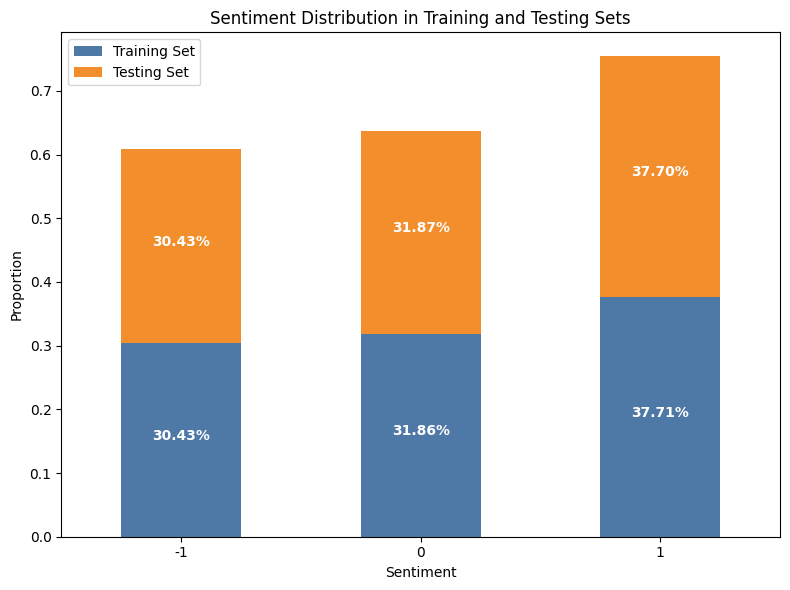

In [139]:

def plot_sentiment_distribution(y_train, y_test):
    fig, ax = plt.subplots(figsize=(8, 6))

    #Colors for the bars
    colors = ['#4e79a7', '#f28e2c']

    # Create a DataFrame from value counts
    data = {
        'Training Set': y_train.value_counts(normalize=True).sort_index(),
        'Testing Set': y_test.value_counts(normalize=True).sort_index()
    }
    df = pd.DataFrame(data)

    # Plotting
    df.plot(kind='bar', stacked=True, color=colors, ax=ax, rot=0)
    ax.set_title('Sentiment Distribution in Training and Testing Sets')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Proportion')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), color='white', weight='bold', fontsize=10, ha='center')

    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(y_train, y_test)

Build the machine learning pipeline by:
- Instantiating the preprocessor class and activating your chosen cleaning methods.
- Instantiating the TweetTokenizer with whatever parameters you see fit **(done for you)**.
- Instantiating the TF-IDF vectorizer with whatever parameters you see fit.
- Instantiating a classifier such as LinearSVC with whatever paramters you see fit. You can research sklearn and select any classifier you desire.
- Create a pipeline object which first preprocesses, then vectorises, then classifies.

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Text_Preprocessor and tweet tok instantiation
text_preprocessor = TextPreProcessor()
tweet_tok = TweetTokenizer(strip_handles=True, reduce_len=True)

def custom_tokenizer(text):
    return tweet_tok.tokenize(text)

# Instantiate the TF-IDF vectorizer with custom tokenizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words=text_preprocessor.STOPWORDS, use_idf=True, norm='l2')

# Scale the data before classification (optional, might be needed depending on data characteristics)
#Needed for overfitting issue of LR
scaler = StandardScaler(with_mean=False)  # Use with_mean=False to handle sparse data

# Instantiate a classifier such as LogisticRegression with increased max_iter and different solver
classifier = LogisticRegression(max_iter=1000, solver='saga', C=0.5)

# Create a pipeline object which first preprocesses, then vectorizes, then scales, and finally classifies
pipeline = Pipeline([
    ('preprocessor', text_preprocessor),
    ('vectorizer', tfidf_vectorizer),
    ('scaler', scaler),  # Add the scaler to the pipeline
    ('classifier', classifier)
])

### Training & Evaluation

Train your model and determine it's performance using the standard sklearn classification report metrics.
- Fit the pipeline.
- Predict with the trained pipeline.
- Create the metrics report and display it.

In [138]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
predictions = pipeline.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      2164
           0       0.98      0.88      0.93      2266
           1       0.82      0.94      0.88      2681

    accuracy                           0.90      7111
   macro avg       0.91      0.89      0.90      7111
weighted avg       0.90      0.90      0.90      7111

